In [1]:
import arcpy

In [3]:
# Set environment settings
arcpy.env.workspace = r"C:\Users\thier\Downloads\Projet\Projet"

In [2]:
# Set local variables
inRaster = "Utilisation_Territoire.tif"
outPolygons = "test.shp"
field = "DESC_CAT"

# Run RasterToPolygon
arcpy.conversion.RasterToPolygon(inRaster, outPolygons, "NO_SIMPLIFY", field)

<Result 'C:\\Users\\thier\\Downloads\\Projet\\Projet\\test.shp'>

In [11]:
import pandas


In [ ]:
shapefile = "buffers_2km.shp" # Replace with your shapefile name

# Use a search cursor to iterate through the shapefile
with arcpy.da.SearchCursor(shapefile, ["*"]) as cursor:
    for row in cursor:
        print(row)  # or any operation you want to perform


In [16]:
# Set local variables
in_features = "test.shp"
clip_features = "buffers_1km.shp"
out_feature_class = "buffer_sol_1km_test3.shp"
xy_tolerance = ""

# Run Clip
arcpy.analysis.Clip(in_features, clip_features, out_feature_class)

<Result 'C:\\Users\\thier\\Downloads\\Projet\\Projet\\buffer_sol_1km_test3.shp'>

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [1]:
import whitebox
wbt = whitebox.WhiteboxTools()


In [ ]:
wbt.clip(
    i=r"C:\Users\thier\Downloads\Projet\Projet\test.shp", 
    clip=r"C:\Users\thier\Downloads\Projet\Projet\buffers_2km.shp", 
    output=r"C:\Users\thier\Downloads\Projet\Projet\clip_test2.shp"
)

In [ ]:
gdf = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\clip_test2.shp")
gdf.head(50)

In [61]:
coupe_rows = gdf[gdf['DESC_CAT'].str.contains('Coupe', case=False, na=False)]
coupe_rows

,Id,gridcode,DESC_CAT,geometry
41,3635,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((665283.836 5150690.460, 665272.149 5..."
114,3975,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((663589.158 5150253.515, 663565.783 5..."
213,4393,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((666031.832 5149863.807, 666031.832 5..."
215,4401,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((666043.520 5149875.616, 666043.520 5..."
216,4401,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((666207.144 5150086.213, 666207.144 5..."
...,...,...,...,...
8015,26644,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674061.103 5129516.339, 674049.416 5..."
8027,26657,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674072.790 5129504.530, 674061.103 5..."
8111,26767,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674201.352 5129398.246, 674201.352 5..."
8112,26767,5,Coupe et rÃ©gÃ©nÃ©rat,"POLYGON ((674228.522 5129469.102, 674236.415 5..."


In [65]:
new_name = 'Coupe'
gdf.loc[gdf['DESC_CAT'] == 'Coupe et rÃ©gÃ©nÃ©rat', 'DESC_CAT'] = new_name

<Axes: >

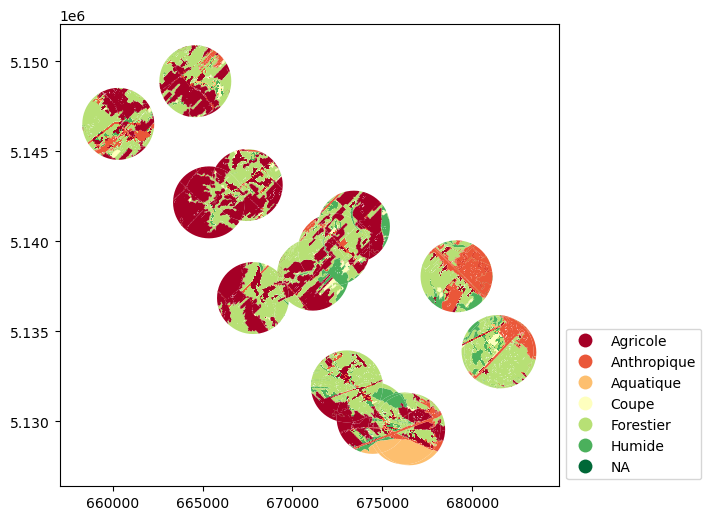

In [66]:

fig, ax = plt.subplots(figsize=(10, 6)) 
gdf.plot(column='DESC_CAT', cmap='RdYlGn', legend=True, ax=ax,
         legend_kwds={'loc': 'lower left', 'bbox_to_anchor': (1, 0)})



In [38]:
import pandas as pd

In [41]:
df1 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_500m.csv")
df2 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_2km.csv")
df3 = pd.read_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_1km.csv")

In [51]:
df1_selected = df1[['Clipped Length']].rename(columns={'Clipped Length': '500m'}) 
df2_selected = df2[['Clipped Length']].rename(columns={'Clipped Length': '1km'})
df3_selected = df3[['Clipped Length']].rename(columns={'Clipped Length': '2km'})


In [ ]:
combined_df = pd.concat([df1_selected, df2_selected, df3_selected], axis=1)
combined_df

In [ ]:
combined_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_all.csv")
combined_df